# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Text Preprocessing 
import nltk
import re, string
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder

# Text Visualization - Wordcloud
from wordcloud import WordCloud

# Vectorization using TF, TF-IDF and Doc2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors

# For the Progress Bar
from time import sleep
from tqdm import tqdm

# Dimensional Reduction
from sklearn.decomposition import PCA

# Train Test SPlit
from sklearn.model_selection import train_test_split

# Performance Measure
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
import xgboost

# Importing the Dataset

## 1. Reading the Data
    Reading the data in the Datframe with two columns named SMS and Labels.

In [2]:
data = pd.read_csv(r"C:\Users\amarc\Downloads\Praxis\2nd sem\AML\ET\SMSSpamCollection.csv")
data

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.shape

(5574, 2)

## 2. Text Pre-Processing

In [3]:
def preprocessing(data, duplicate = True):
    
    print(f"Preprocessing BEGAN.....\n")
    
    # Label Encoding the Target Column and making a new column for that
    print(f"-Encoding begins....")
    le = LabelEncoder()
    data["Label_encoded"] = le.fit_transform(data.Label)
    
#     data["encodeLabel"] = pd.get_dummies(data.Label)
    print(f"-Encoding ends...")
    
    # Checking for Duplicates because if there are any duplicates that will be cause noise and will give extra bias.
    if duplicate == True:
        print(f"-Checking for Duplicate data.....")
        if data.duplicated().sum() > 0:
            print(f"--There are {data.duplicated().sum()} duplicated values in the dataset.")
            print(f"--Dropping the Duplicate Values....")
            data.drop_duplicates(inplace = True)
            data = data.reset_index()
            data = data.drop("index", axis = 1)
            print(f"--Duplicate values were succesfully dropped.")
        else:
            print(f"There is no duplicate values in the dataset.")
        print(f"-Completetion of treating duplicate data.\n")
    
    # Converting Uppercase to Lower Case as this can cause model to give more preferance to 
    # uppercase letter and we dont want that
    print(f"-Converting UPPER case to LOWER case characters....")
    data["SMS"] = data["SMS"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(f"-Process Completed for converting UPPER case to LOWER case.\n")
    
    # Deleting the Punctuation Marks as they are noise for the model and doesnt provide any significance.
    print(f"-Removing the PUNCTUATION marks....")
    data["SMS"] = data["SMS"].str.replace('[^\w\s]','')
    print(f"-PUNCTUATION was succesfully deleted.\n")
    
    # Deleting the Stopwords as they are the most common words in english language and it would act as noise
    print(f"-Removing of Stopwords started....")
    stop_words = set(stopwords.words("english") + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    data["SMS"] = data["SMS"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    print(f"-Removal of Stopwords is done.\n")
    
    # Doing Lemmatization which will hep us to get the Root word like caring will change to care.
    print(f"-LEMMATIZATION is started....")
    data["SMS"] = data["SMS"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(f"-LEMMATIZATION is finished.\n")
    
    # Removing the URLS as they are not helpfull 
    print(f"-Removing of URLS is started....")
    data["SMS"] = data["SMS"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))
    print(f"-URLS are removed.")
    

    print(f"\nPreprocessing END.")
    return data

In [4]:
data_with = data.copy()

In [5]:
data = preprocessing(data, duplicate = True)
data

Preprocessing BEGAN.....

-Encoding begins....
-Encoding ends...
-Checking for Duplicate data.....
--There are 403 duplicated values in the dataset.
--Dropping the Duplicate Values....
--Duplicate values were succesfully dropped.
-Completetion of treating duplicate data.

-Converting UPPER case to LOWER case characters....
-Process Completed for converting UPPER case to LOWER case.

-Removing the PUNCTUATION marks....
-PUNCTUATION was succesfully deleted.

-Removing of Stopwords started....
-Removal of Stopwords is done.

-LEMMATIZATION is started....
-LEMMATIZATION is finished.

-Removing of URLS is started....
-URLS are removed.

Preprocessing END.


,Label,SMS,Label_encoded
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif oni,0
2,spam,free entry wkly comp win fa cup final tkts 21s...,1
3,ham,dun say early hor c already say,0
4,ham,nah think go usf life around though,0
...,...,...,...
5166,spam,2nd time tried contact â750 pound prize claim ...,1
5167,ham,ã¼ b going esplanade fr home,0
5168,ham,pity mood soany suggestion,0
5169,ham,guy bitching acted like id interested buying s...,0


In [6]:
data_with = preprocessing(data_with, duplicate = False)

Preprocessing BEGAN.....

-Encoding begins....
-Encoding ends...
-Converting UPPER case to LOWER case characters....
-Process Completed for converting UPPER case to LOWER case.

-Removing the PUNCTUATION marks....
-PUNCTUATION was succesfully deleted.

-Removing of Stopwords started....
-Removal of Stopwords is done.

-LEMMATIZATION is started....
-LEMMATIZATION is finished.

-Removing of URLS is started....
-URLS are removed.

Preprocessing END.


In [7]:
data.shape

(5171, 3)

In [8]:
data.drop_duplicates(inplace = True)
data = data.reset_index()
data = data.drop("index", axis = 1)

In [9]:
data_with.shape

(5574, 3)

## 3. Data Exploration

    Visualization of the words using word cloud.
    1. We will make wordcloud for the whole dataset.
    2. Wordcloud for Spam.
    3. Wordcloud for Ham

<function matplotlib.pyplot.show(close=None, block=None)>

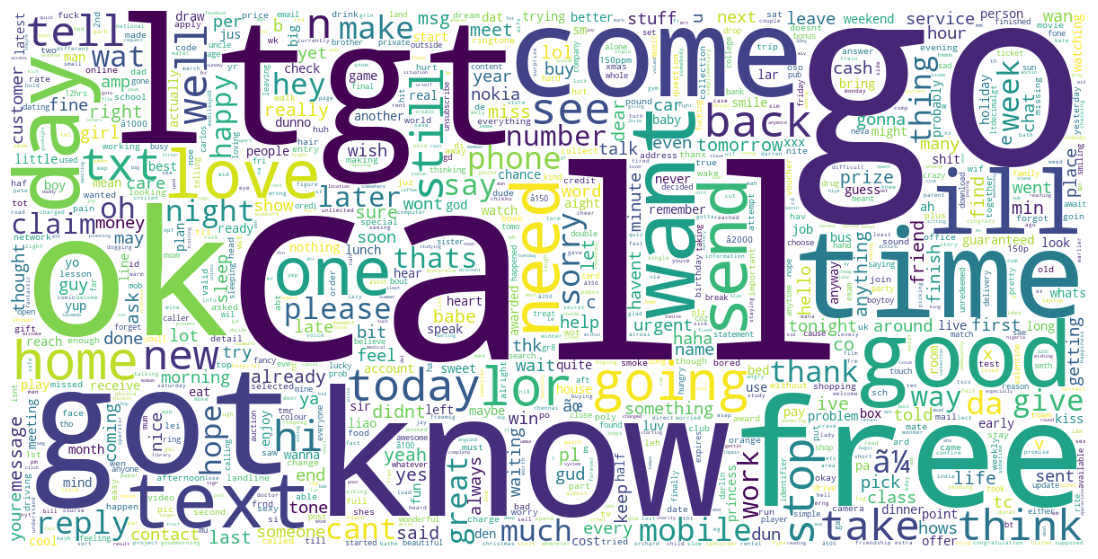

In [11]:
# Wordcloud for Whole Dataset
sms = " ".join(i for i in data.SMS)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)
wc.generate(sms)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [12]:
# Seperating the Words into Spam and Ham
spam = ''
ham = ''
for i in range(data.shape[0]):
    if data.Label[i] == "spam":
        spam = spam + data.SMS[i]
        
    else:
        ham = ham + data.SMS[i]

<function matplotlib.pyplot.show(close=None, block=None)>

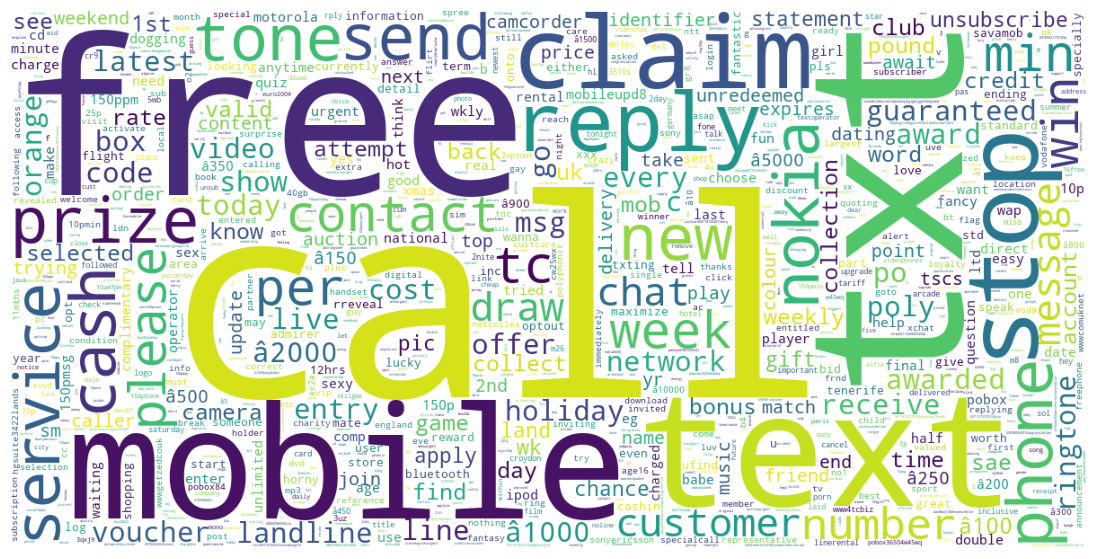

In [13]:
# Wordcloud for Spam
wc.generate(spam)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

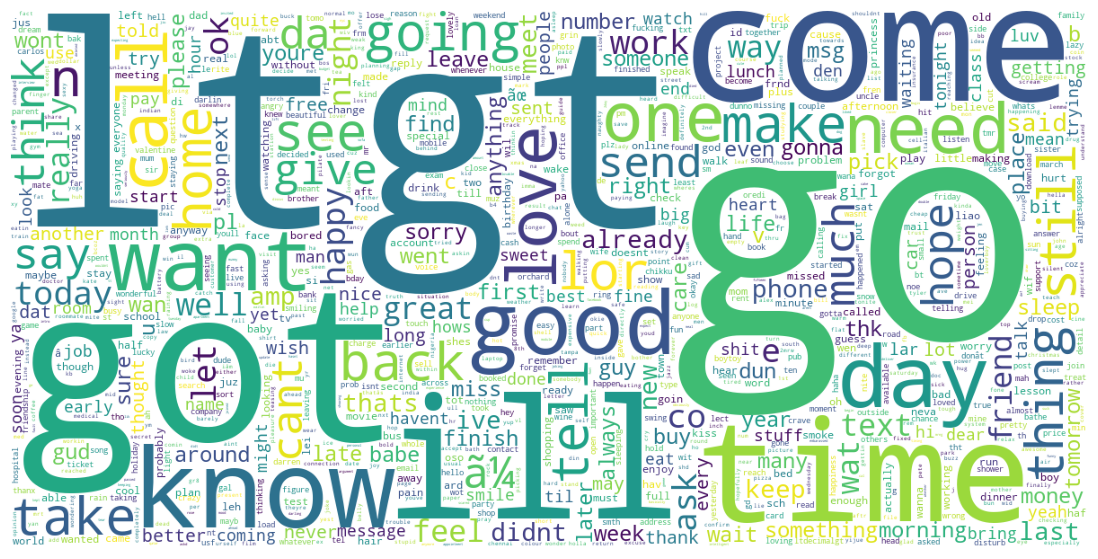

In [14]:
# Wordcloud for Ham
wc.generate(ham)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

## 4. Vectorization

### A. Vectorization using TF

In [15]:
# Using count vectoroizer to create a document-term matrix
cv = CountVectorizer()
transform = cv.fit_transform(data.SMS)
names = cv.get_feature_names_out()

# Converting the document-term matrix to a dataframe
DTM_TF = pd.DataFrame(data=transform.toarray(), columns=names)
DTM_TF

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,âmorrow,ârents,âs,âthanks,âœ,âœharry,ã¼,ã¼ll,ãœ,ãœll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### B. Vectorization using TF-IDF

In [16]:
tfidf_vec = TfidfVectorizer()
tfidf_vectors = tfidf_vec.fit_transform(data.SMS)

names = tfidf_vec.get_feature_names_out()

tfidf_vectors = tfidf_vectors.toarray()

tfidf_vectors = pd.DataFrame(tfidf_vectors, columns=names)
tfidf_vectors

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,âmorrow,ârents,âs,âthanks,âœ,âœharry,ã¼,ã¼ll,ãœ,ãœll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.376023,0.0,0.0,0.0
5110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### C. Doc2Vec Model

In [10]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative/GoogleNews-vectors-negative300.bin',
                                          binary=True)

In [11]:
def embeddings(word):
    if word in model.key_to_index:
        return model.get_vector(word)
    else:
        return np.zeros(300)

In [12]:
from collections import defaultdict
out_dict = defaultdict(list)

# out_dict = {}
i = 0
for sen in data_with.SMS:
    average_vector = (np.mean(np.array([embeddings(x) for x in nltk.word_tokenize(sen)]), axis=0))
    d1 = {sen: (average_vector)}
    out_dict.update(d1)

In [13]:
document_matrix = pd.DataFrame(out_dict).T
document_matrix["SMS"] = document_matrix.index
document_matrix.reset_index(inplace = True)
document_matrix = document_matrix.drop('index',axis=1)

In [14]:
doc2vec = pd.merge(document_matrix, data_with, on="SMS", how = "left")

In [15]:
doc2vec.drop_duplicates(inplace = True)

## 5. Dimensional Reduction & Visualization

    We will do PCA for Dimensional Reduction and will keep the components that explain at least 95% of overall
    varaince.

In [23]:
cleaned_data = data.copy()

In [24]:
# Initialize PCA with 2 components
pca = PCA(n_components=0.95)

# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(DTM_TF)

# save our two dimensions into x0 and x1
cleaned_data['tf_x0'] = pca_vecs[:, 0]
cleaned_data['tf_x1'] = pca_vecs[:, 1]

In [25]:
# Initialize PCA with 2 components
pca = PCA(n_components=0.95)

# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(tfidf_vectors)

# save our two dimensions into x0 and x1
cleaned_data['tfidf_x0'] = pca_vecs[:, 0]
cleaned_data['tfidf_x1'] = pca_vecs[:, 1]

In [26]:
doc2vec = doc2vec.dropna()

In [27]:
# Initialize PCA with 2 components
pca = PCA(n_components=0.95)

temp = doc2vec.drop(["SMS", "Label", "Label_encoded"], axis=1)
pca_vecs = pca.fit_transform(temp)

### Visualization

<Axes: xlabel='tf_x0', ylabel='tf_x1'>

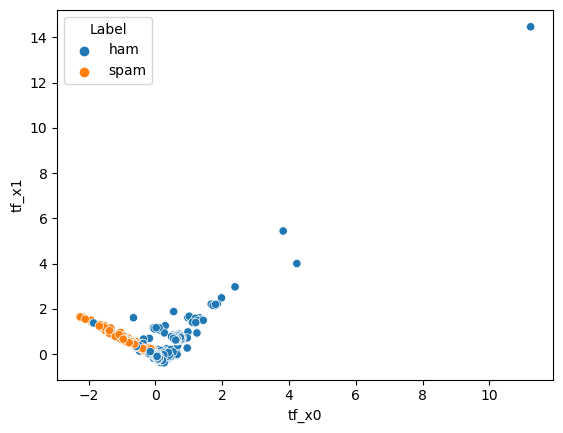

In [28]:
# TF Vectors
sns.scatterplot(x = cleaned_data["tf_x0"], y = cleaned_data["tf_x1"], data = cleaned_data, hue = cleaned_data["Label"])

<Axes: xlabel='tfidf_x0', ylabel='tfidf_x1'>

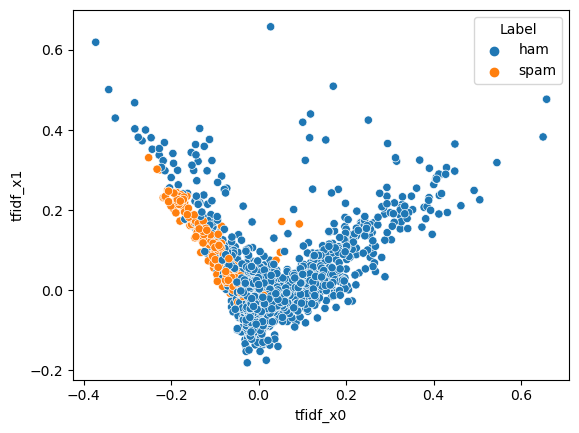

In [29]:
# TF-IDF
sns.scatterplot(x = cleaned_data["tfidf_x0"], y = cleaned_data["tfidf_x1"], data = cleaned_data, hue = cleaned_data["Label"])

<Axes: >

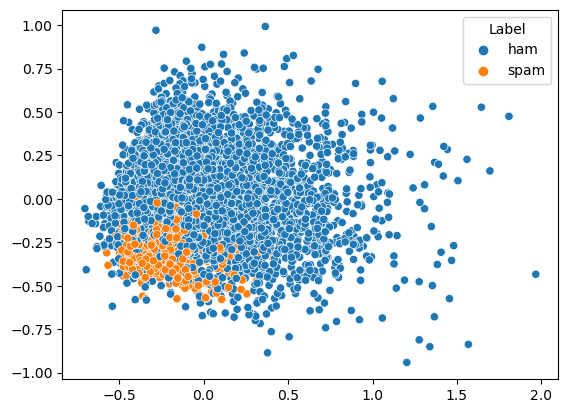

In [30]:
# Doc2Vec Models
sns.scatterplot(x = pca_vecs[:, 0], y = pca_vecs[:, 1], data = temp, hue = doc2vec["Label"])

## 6. Spam Filters

    We will fit various models on our vectorized data.

In [16]:
def results(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

In [17]:
# Parameter declaration for Grid Search CV

## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1]}

## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [30, 40, 50, 60], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20], 
              "min_samples_leaf" : [3,5,7,9], "n_estimators" : [50], "max_features" : [7,9,11] }

## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [10,20,35,50,75,100,125,150,175,200,225,250]}

## Tuning Parameters for SUpport Vector Classifier
params_svc = {'kernel':['poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale']}

## Tuning Parameters for K-Neigbors Classifier
params_knnc = {"n_neighbors": range(1, 21, 2), "weights": ['uniform', 'distance'],
               "metric": ['euclidean', 'manhattan']}

## Tuning Parameters for Bagging Classifier
params_bc = {'n_estimators':[10, 100, 1000]}

## Tuning Parameters for Stochastic Gradiant Boosting Classifier
params_sgb = {"learning_rate": [0.001, 0.01, 0.1], "n_estimators": [10, 100, 1000], 
              'subsample': [0.5, 0.7, 1.0], 'max_depth': [3, 7, 9]}

In [18]:
def best_params(X, y, param_grid, model):
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=5, scoring='f1',
                               error_score=0, verbose = 10)
    grid_result = grid_search.fit(X, y)
    
    # Printing the Result
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

# TF vectors Models

In [34]:
# Splitting TF Vectors into Train and Test
y = data["Label_encoded"]
X_train, X_valid, y_train, y_valid = train_test_split(DTM_TF, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### 1. Logistic Regression

In [35]:
lr = LogisticRegression()
best_params(X_train, y_train, params_logit, lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.876174 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.876174 (0.032960) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.722880 (0.025973) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.841507 (0.034393) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
0.873683 (0.031230) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
0.841507 (0.034393) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.876174 (0.032960) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.728145 (0.029305) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.869987 (0.029140) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.876174 (0.032960) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.845861 (0.036044) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


In [36]:
lr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.98      0.78      0.87       200

    accuracy                           0.97      1534
   macro avg       0.97      0.89      0.92      1534
weighted avg       0.97      0.97      0.97      1534

[[1331    3]
 [  45  155]]


### 2. Decision Tree Classifier

In [37]:
dtc = DecisionTreeClassifier()
best_params(X_train, y_train, params_dtf, dtc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.717229 using {'min_samples_leaf': 5, 'max_depth': 30, 'criterion': 'entropy'}
0.545919 (0.072096) with: {'min_samples_leaf': 20, 'max_depth': 50, 'criterion': 'entropy'}
0.635894 (0.077519) with: {'min_samples_leaf': 10, 'max_depth': 30, 'criterion': 'gini'}
0.714977 (0.065409) with: {'min_samples_leaf': 5, 'max_depth': 50, 'criterion': 'gini'}
0.560822 (0.099899) with: {'min_samples_leaf': 50, 'max_depth': 50, 'criterion': 'gini'}
0.555101 (0.079449) with: {'min_samples_leaf': 20, 'max_depth': 40, 'criterion': 'gini'}
0.560822 (0.099899) with: {'min_samples_leaf': 50, 'max_depth': 50, 'criterion': 'entropy'}
0.545919 (0.072096) with: {'min_samples_leaf': 20, 'max_depth': 40, 'criterion': 'entropy'}
0.710317 (0.060663) with: {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'gini'}
0.717229 (0.056794) with: {'min_samples_leaf': 5, 'max_depth': 30, 'criterion': 'entropy'}
0.545919 (0.072096) with: {'min_samples_lea

In [38]:
dtc = DecisionTreeClassifier(max_depth = 30, min_samples_leaf = 5, criterion = 'entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1334
           1       0.92      0.60      0.73       200

    accuracy                           0.94      1534
   macro avg       0.93      0.80      0.85      1534
weighted avg       0.94      0.94      0.94      1534

[[1324   10]
 [  80  120]]


### 3. Random Forest Classifier

In [39]:
rfc = RandomForestClassifier()
best_params(X_train, y_train, params_rfc, rfc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.000000 using {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_features': 7, 'max_depth': 9}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_features': 7, 'max_depth': 9}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 15, 'max_features': 9, 'max_depth': 7}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_features': 11, 'max_depth': 7}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_features': 7, 'max_depth': 7}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_features': 9, 'max_depth': 13}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_features': 9, 'max_depth': 7}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_s

In [40]:
rfc = RandomForestClassifier(max_depth = 9, max_leaf_nodes = 20, min_samples_leaf = 3, 
                             n_estimators = 50, max_features = 7)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1334
           1       0.00      0.00      0.00       200

    accuracy                           0.87      1534
   macro avg       0.43      0.50      0.47      1534
weighted avg       0.76      0.87      0.81      1534

[[1334    0]
 [ 200    0]]


### 4. Ada Boost Classifier

In [41]:
adc = AdaBoostClassifier()
best_params(X_train, y_train, params_adc, adc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.839175 using {'n_estimators': 125}
0.828552 (0.035537) with: {'n_estimators': 225}
0.833752 (0.038857) with: {'n_estimators': 250}
0.828632 (0.036472) with: {'n_estimators': 200}
0.784936 (0.060550) with: {'n_estimators': 20}
0.811888 (0.048326) with: {'n_estimators': 75}
0.834249 (0.040969) with: {'n_estimators': 100}
0.826178 (0.031779) with: {'n_estimators': 150}
0.651354 (0.058246) with: {'n_estimators': 10}
0.788903 (0.038368) with: {'n_estimators': 35}
0.839175 (0.036023) with: {'n_estimators': 125}


In [42]:
adc = AdaBoostClassifier(n_estimators = 125)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1334
           1       0.93      0.77      0.84       200

    accuracy                           0.96      1534
   macro avg       0.95      0.88      0.91      1534
weighted avg       0.96      0.96      0.96      1534

[[1323   11]
 [  46  154]]


### 5. Support Vector Classifier

In [43]:
svc = SVC()
best_params(X_train, y_train, params_svc, svc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.869294 using {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1.0}
0.754657 (0.051281) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
0.754657 (0.051281) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 50}
0.175511 (0.048056) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.1}
0.727586 (0.041676) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}
0.511563 (0.035485) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 50}
0.000000 (0.000000) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.01}
0.869294 (0.044686) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1.0}
0.504291 (0.031093) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}
0.000000 (0.000000) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.01}
0.000000 (0.000000) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}


In [44]:
svc = SVC(kernel = 'sigmoid' , C = 1 , gamma = 'scale' )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.98      0.76      0.86       200

    accuracy                           0.97      1534
   macro avg       0.97      0.88      0.92      1534
weighted avg       0.97      0.97      0.96      1534

[[1331    3]
 [  48  152]]


### 6. K-Neighbors Classifier

In [45]:
knnc = KNeighborsClassifier()
best_params(X_train, y_train, params_knnc, knnc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.540733 using {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}
0.298542 (0.064559) with: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
0.032364 (0.028853) with: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'euclidean'}
0.045479 (0.025915) with: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
0.013115 (0.016062) with: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean'}
0.013115 (0.016062) with: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'euclidean'}
0.136661 (0.029701) with: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}
0.070353 (0.037203) with: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'euclidean'}
0.044653 (0.043003) with: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
0.107540 (0.015079) with: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan'}
0.540733 (0.033089) with: {'wei

In [46]:
knnc = KNeighborsClassifier(n_neighbors = 1, weights = 'distance' , metric = 'manhattan')
knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1334
           1       1.00      0.40      0.57       200

    accuracy                           0.92      1534
   macro avg       0.96      0.70      0.76      1534
weighted avg       0.93      0.92      0.91      1534

[[1334    0]
 [ 121   79]]


### 7. Bagging Classifier

In [ ]:
bc = BaggingClassifier()
best_params(X_train, y_train, params_bc, bc)

In [ ]:
bc = BaggingClassifier(n_estimators = )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_valid)
results(y_valid, y_pred)

# TF-IDF Vector Models

In [47]:
# Splitting TF-IDF Vectors into Train and Test
y = data["Label_encoded"]
X_train, X_valid, y_train, y_valid = train_test_split(tfidf_vectors, y, test_size = 0.3)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### 1. Logistic Regression

In [48]:
lr = LogisticRegression()
best_params(X_train, y_train, params_logit, lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.837115 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.837115 (0.015391) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.423109 (0.092250) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.837115 (0.015391) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.806372 (0.032390) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.428113 (0.085809) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.000000 (0.000000) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.423109 (0.092250) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
0.806372 (0.032390) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.000000 (0.000000) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.837115 (0.015391) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}


In [49]:
lr = LogisticRegression(penalty = 'l2' , solver ='newton-cg' , C =100 )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1346
           1       0.99      0.72      0.83       188

    accuracy                           0.96      1534
   macro avg       0.97      0.86      0.91      1534
weighted avg       0.96      0.96      0.96      1534

[[1344    2]
 [  53  135]]


### 2. Decision Tree Classifier

In [50]:
dtc = DecisionTreeClassifier()
best_params(X_train, y_train, params_dtf, dtc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.711530 using {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'gini'}
0.701702 (0.022400) with: {'min_samples_leaf': 5, 'max_depth': 50, 'criterion': 'entropy'}
0.707561 (0.044649) with: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
0.486563 (0.062619) with: {'min_samples_leaf': 50, 'max_depth': 30, 'criterion': 'gini'}
0.694063 (0.039752) with: {'min_samples_leaf': 20, 'max_depth': 60, 'criterion': 'gini'}
0.692582 (0.020441) with: {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'entropy'}
0.691149 (0.041614) with: {'min_samples_leaf': 20, 'max_depth': 40, 'criterion': 'entropy'}
0.707561 (0.044649) with: {'min_samples_leaf': 10, 'max_depth': 60, 'criterion': 'entropy'}
0.486563 (0.062619) with: {'min_samples_leaf': 50, 'max_depth': 40, 'criterion': 'gini'}
0.691149 (0.041614) with: {'min_samples_leaf': 20, 'max_depth': 30, 'criterion': 'entropy'}
0.711530 (0.041235) with: {'min_sample

In [52]:
dtc = DecisionTreeClassifier(max_depth = 50 , min_samples_leaf = 10 , criterion = 'gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1346
           1       0.86      0.59      0.70       188

    accuracy                           0.94      1534
   macro avg       0.90      0.79      0.83      1534
weighted avg       0.93      0.94      0.93      1534

[[1328   18]
 [  77  111]]


### 3. Random Forest Classifier

In [53]:
rfc = RandomForestClassifier()
best_params(X_train, y_train, params_rfc, rfc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.000000 using {'n_estimators': 50, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_features': 9, 'max_depth': 13}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_features': 9, 'max_depth': 13}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 10, 'max_features': 9, 'max_depth': 13}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 15, 'max_features': 11, 'max_depth': 11}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 15, 'max_features': 9, 'max_depth': 11}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 20, 'max_features': 11, 'max_depth': 7}
0.000000 (0.000000) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_features': 9, 'max_depth': 13}
0.000000 (0.000000) with: {'n_estimators': 50, 

In [54]:
rfc = RandomForestClassifier(max_depth = 13, max_leaf_nodes =15 , min_samples_leaf =5 , 
                             n_estimators =50 , max_features =9 )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1346
           1       0.00      0.00      0.00       188

    accuracy                           0.88      1534
   macro avg       0.44      0.50      0.47      1534
weighted avg       0.77      0.88      0.82      1534

[[1346    0]
 [ 188    0]]


### 4. Ada Boost Classifier

In [59]:
adc = AdaBoostClassifier()
best_params(X_train, y_train, params_adc, adc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.831464 using {'n_estimators': 75}
0.816753 (0.037922) with: {'n_estimators': 175}
0.829363 (0.031608) with: {'n_estimators': 125}
0.820507 (0.033972) with: {'n_estimators': 150}
0.828301 (0.022399) with: {'n_estimators': 100}
0.794296 (0.024080) with: {'n_estimators': 20}
0.814085 (0.023359) with: {'n_estimators': 50}
0.831464 (0.019614) with: {'n_estimators': 75}
0.821026 (0.034152) with: {'n_estimators': 250}
0.822329 (0.025253) with: {'n_estimators': 225}
0.731111 (0.026497) with: {'n_estimators': 10}


In [60]:
adc = AdaBoostClassifier(n_estimators = 75 )
adc.fit(X_train, y_train)
y_pred = adc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1346
           1       0.92      0.75      0.83       188

    accuracy                           0.96      1534
   macro avg       0.94      0.87      0.90      1534
weighted avg       0.96      0.96      0.96      1534

[[1334   12]
 [  47  141]]


### 5. Support Vector Classifier

In [57]:
svc = SVC()
best_params(X_train, y_train, params_svc, svc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.800087 using {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 50}
0.800087 (0.028125) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 50}
0.793405 (0.040267) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 50}
0.000000 (0.000000) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.01}
0.000000 (0.000000) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.01}
0.354231 (0.057373) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}
0.793405 (0.040267) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
0.354231 (0.057373) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 50}
0.000000 (0.000000) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.01}
0.000000 (0.000000) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
0.000000 (0.000000) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.1}


In [58]:
svc = SVC(kernel = 'sigmoid', C = 50 , gamma = 'scale' )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1346
           1       0.93      0.69      0.79       188

    accuracy                           0.96      1534
   macro avg       0.94      0.84      0.88      1534
weighted avg       0.95      0.96      0.95      1534

[[1336   10]
 [  59  129]]


### 6. K-Neighbors Classifier

In [55]:
knnc = KNeighborsClassifier()
best_params(X_train, y_train, params_knnc, knnc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.815072 using {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean'}
0.796182 (0.038802) with: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
0.721896 (0.061977) with: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}
0.724016 (0.059097) with: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'euclidean'}
0.717695 (0.073167) with: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'euclidean'}
0.745395 (0.050223) with: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}
0.614293 (0.029865) with: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}
0.020573 (0.016799) with: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'manhattan'}
0.721608 (0.058415) with: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean'}
0.815072 (0.040721) with: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean'}
0.614293 (0.029865) with: {'weights'

In [56]:
knnc = KNeighborsClassifier(n_neighbors = 1 , weights = 'distance' , metric = 'euclidean')
knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1346
           1       0.97      0.73      0.83       188

    accuracy                           0.96      1534
   macro avg       0.97      0.86      0.91      1534
weighted avg       0.96      0.96      0.96      1534

[[1342    4]
 [  51  137]]


### 7. Bagging Classifier

In [ ]:
bc = BaggingClassifier()
best_params(X_train, y_train, params_bc, bc)

In [ ]:
bc = BaggingClassifier(n_estimators = )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_valid)
results(y_valid, y_pred)

# Doc2Vec Models

In [25]:
# Splitting TF-IDF Vectors into Train and Test
y = doc2vec["Label_encoded"]
X = doc2vec.drop(['SMS','Label','Label_encoded'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### 1. Logistic Regression

In [26]:
lr = LogisticRegression()
best_params(X_train, y_train, params_logit, lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.765457 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.753288 (0.023727) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.150469 (0.019558) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.765457 (0.038742) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.724561 (0.022935) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.754398 (0.022586) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.134403 (0.013173) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
0.724561 (0.022935) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}
0.751448 (0.022192) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
0.765457 (0.038742) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.724561 (0.022935) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}


In [32]:
lr = LogisticRegression( solver = 'newton-cg' , C = 10 )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1357
           1       0.76      0.82      0.79       177

    accuracy                           0.95      1534
   macro avg       0.87      0.89      0.88      1534
weighted avg       0.95      0.95      0.95      1534

[[1311   46]
 [  32  145]]


### 2. Decision Tree Classifier

In [33]:
dtc = DecisionTreeClassifier()
best_params(X_train, y_train, params_dtf, dtc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.649785 using {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'entropy'}
0.622124 (0.051455) with: {'min_samples_leaf': 20, 'max_depth': 60, 'criterion': 'entropy'}
0.586179 (0.022558) with: {'min_samples_leaf': 5, 'max_depth': 30, 'criterion': 'gini'}
0.549627 (0.038537) with: {'min_samples_leaf': 50, 'max_depth': 60, 'criterion': 'gini'}
0.619607 (0.021866) with: {'min_samples_leaf': 20, 'max_depth': 30, 'criterion': 'gini'}
0.596277 (0.042567) with: {'min_samples_leaf': 10, 'max_depth': 60, 'criterion': 'gini'}
0.649785 (0.028158) with: {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'entropy'}
0.620860 (0.020347) with: {'min_samples_leaf': 20, 'max_depth': 40, 'criterion': 'gini'}
0.549627 (0.038537) with: {'min_samples_leaf': 50, 'max_depth': 30, 'criterion': 'gini'}
0.569985 (0.036791) with: {'min_samples_leaf': 50, 'max_depth': 40, 'criterion': 'entropy'}
0.619607 (0.021866) with: {'min_samples_leaf'

In [35]:
dtc = DecisionTreeClassifier(max_depth = 60, min_samples_leaf = 5 , criterion = 'entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1357
           1       0.70      0.72      0.71       177

    accuracy                           0.93      1534
   macro avg       0.83      0.84      0.84      1534
weighted avg       0.93      0.93      0.93      1534

[[1302   55]
 [  49  128]]


### 3. Random Forest Classifier

In [36]:
rfc = RandomForestClassifier()
best_params(X_train, y_train, params_rfc, rfc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.643556 using {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_features': 11, 'max_depth': 13}
0.572857 (0.061965) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 15, 'max_features': 7, 'max_depth': 11}
0.486886 (0.044975) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 10, 'max_features': 7, 'max_depth': 7}
0.505415 (0.033207) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_features': 9, 'max_depth': 11}
0.555201 (0.043478) with: {'n_estimators': 50, 'min_samples_leaf': 7, 'max_leaf_nodes': 10, 'max_features': 11, 'max_depth': 13}
0.623156 (0.043627) with: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_features': 9, 'max_depth': 9}
0.643556 (0.011643) with: {'n_estimators': 50, 'min_samples_leaf': 9, 'max_leaf_nodes': 20, 'max_features': 11, 'max_depth': 13}
0.605117 (0.037979) with: {'n_estimators': 50, 

In [37]:
rfc = RandomForestClassifier(max_depth =13 , max_leaf_nodes =20 , min_samples_leaf =9 , 
                             n_estimators =50 , max_features =11 )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1357
           1       0.99      0.44      0.60       177

    accuracy                           0.93      1534
   macro avg       0.96      0.72      0.78      1534
weighted avg       0.94      0.93      0.92      1534

[[1356    1]
 [ 100   77]]


### 4. Ada Boost Classifier

In [42]:
adc = AdaBoostClassifier()
best_params(X_train, y_train, params_adc, adc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.848546 using {'n_estimators': 250}
0.792784 (0.026626) with: {'n_estimators': 50}
0.845973 (0.043757) with: {'n_estimators': 225}
0.796556 (0.031223) with: {'n_estimators': 35}
0.841711 (0.033678) with: {'n_estimators': 125}
0.763759 (0.044171) with: {'n_estimators': 20}
0.842398 (0.039379) with: {'n_estimators': 150}
0.848546 (0.048218) with: {'n_estimators': 250}
0.848075 (0.033429) with: {'n_estimators': 200}
0.665348 (0.034759) with: {'n_estimators': 10}
0.836051 (0.048520) with: {'n_estimators': 100}


In [43]:
adc = AdaBoostClassifier(n_estimators = 250)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1357
           1       0.86      0.89      0.88       177

    accuracy                           0.97      1534
   macro avg       0.92      0.94      0.93      1534
weighted avg       0.97      0.97      0.97      1534

[[1332   25]
 [  19  158]]


### 5. Support Vector Classifier

In [38]:
svc = SVC()
best_params(X_train, y_train, params_svc, svc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.894170 using {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
0.529600 (0.027075) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 10}
0.000000 (0.000000) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.01}
0.000000 (0.000000) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.1}
0.000000 (0.000000) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.01}
0.517003 (0.037887) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 50}
0.894170 (0.024241) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
0.890874 (0.027270) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 50}
0.006250 (0.012500) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.1}
0.560863 (0.033549) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}
0.828871 (0.036021) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}


In [39]:
svc = SVC(kernel = 'rbf', C = 10 , gamma = 'scale' )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1357
           1       0.93      0.92      0.93       177

    accuracy                           0.98      1534
   macro avg       0.96      0.96      0.96      1534
weighted avg       0.98      0.98      0.98      1534

[[1345   12]
 [  14  163]]


### 6. K-Neighbors Classifier

In [40]:
knnc = KNeighborsClassifier()
best_params(X_train, y_train, params_knnc, knnc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.785658 using {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
0.759863 (0.035585) with: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan'}
0.784881 (0.051109) with: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'manhattan'}
0.785658 (0.035476) with: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
0.718266 (0.046027) with: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}
0.764443 (0.048211) with: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'euclidean'}
0.766906 (0.045503) with: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
0.763644 (0.038570) with: {'weights': 'uniform', 'n_neighbors': 17, 'metric': 'euclidean'}
0.767272 (0.044738) with: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
0.760673 (0.040966) with: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'manhattan'}
0.765982 (0.047967) with: {'weight

In [41]:
knnc = KNeighborsClassifier(n_neighbors = 7 , weights = 'distance' , metric = 'manhattan')
knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_valid)
results(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1357
           1       0.69      0.92      0.79       177

    accuracy                           0.94      1534
   macro avg       0.84      0.93      0.88      1534
weighted avg       0.95      0.94      0.95      1534

[[1284   73]
 [  14  163]]


## Results

### 1 Overall , Logistic regression was one of the best models.

### 2 Term Frequency(TF) and TF-IDF were better embedding technique then Doc2Vec.

### 3 Doc2Vec perform poorly it can be because of that model was trained in 2013 on Google News.

### 4 Many of the words were not present in Google pre trained model so we have to drop those rows.

### 5 In Future we can use other pre trained models like Elmo, Glove etc. 

### 6 We could also use Deep Learning sequential Models like LSTM(Long Short Term Memory), GRU(Gated Recurrent Networks) etc.
